Theta for Polynomial Regression model with order 0 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


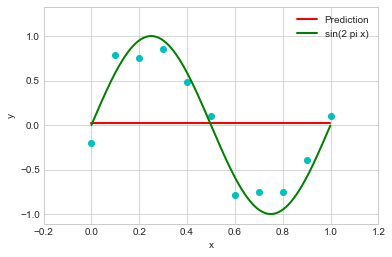

Theta for Polynomial Regression model with order 0 is [ -0.11875372  10.19291697 -30.01354795  20.16443212]


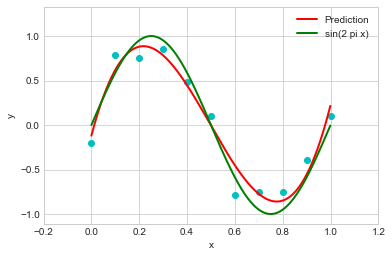

Theta for Polynomial Regression model with order 0 is [-1.80248777e-01  1.45198063e+01 -7.59844492e+01  2.19370596e+02
 -4.10653044e+02  3.95985703e+02 -1.42973857e+02]


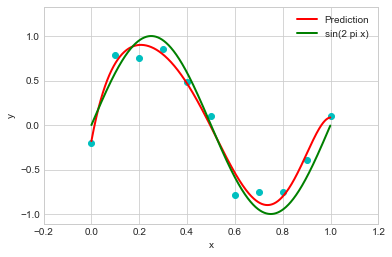

Theta for Polynomial Regression model with order 0 is [-1.99616614e-01  1.32717362e+01  6.29033742e+01 -1.91246714e+03
  1.29683742e+04 -4.30311686e+04  7.92277207e+04 -8.24948365e+04
  4.55311053e+04 -1.03646029e+04]


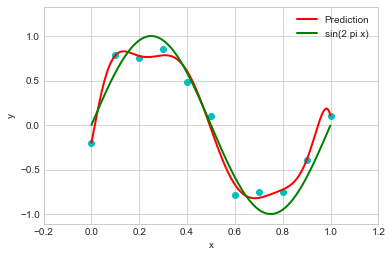

Theta for Polynomial Regression model with order 9, dataset n = 25 is [ 2.00762263e-01  7.92516983e+00 -1.61878003e+02  1.83474347e+03
 -9.31038913e+03  2.47205503e+04 -3.74410427e+04  3.26756842e+04
 -1.53048865e+04  2.97927861e+03]
Theta for Polynomial Regression model with order 9, dataset n = 110 is [-3.78240562e-02  1.25627747e+01 -8.43299961e+01  3.29571810e+02
 -4.60298447e+02 -1.02207595e+03  4.31618126e+03 -5.78044056e+03
  3.50783900e+03 -8.18999336e+02]


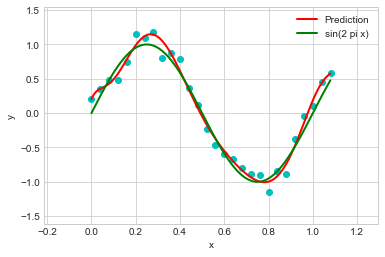

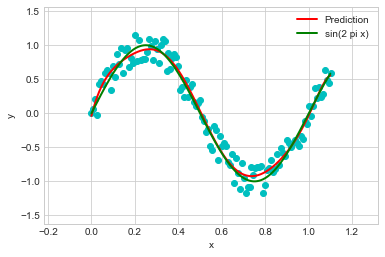

Theta for Ridge Regression poly order=9 is [  0.08474614   5.70208645 -11.44800301  -3.59285612   2.70559852
   5.06076516   4.50479074   2.24110277  -0.86090221  -4.25610612]


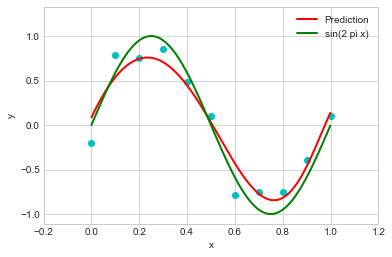

0.3907170794301921
0.4383485527317334
0.37282723929539735
0.33428861215789824
0.30842428271716477
0.2888241801215532
0.2727489062994573
0.2590056905746941
0.24702667558783334
0.2364955181089814
0.22720073727180473
0.21897888191909526
0.2433398755640085
0.2386272684008696
0.2345178796067591
0.23082851677535807
0.2554566335599277
0.25253708114777373
0.24998764114109612
0.24761548219644372
0.2453457808958382
0.24314740854747324
0.24100572880670296
0.23891261276424589
0.2595194603829438
0.25692756498206754
0.25462451682059456
0.25244337613086015
0.25032308362543093
0.24824109368897707
0.24618887151247443
0.2441629977627571
0.2421619386870689
0.24018487083564669
0.238231251040288
0.2363006570604325
0.23439272685611368
0.2325071340746773
0.23064357706472272
0.22880177313314687
0.226981454988616
0.22518236821728377
0.2234042693333203
0.22164692420561524
0.21991010676114633
0.2181935979059322
0.21649718462290657
0.21482065921588828
0.21316381867502524
0.21152646414355014
0.2099084004691481
0.2

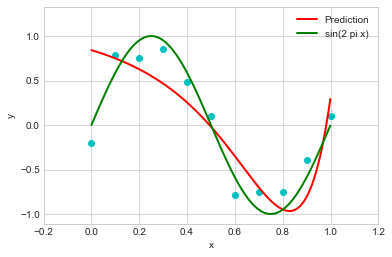

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random


def create(n):
    """Create dataset with length = n"""
    data_x = np.arange(0, 1.1, 1 / n)
    noise = np.arange(-0.2, 0.3, 0.1)
    data_y = np.array([])
    for e in data_x:
        err = random.choice(noise)
        data_y = np.append(data_y, np.sin(2 * np.pi * e) + err)
    return data_x, data_y


def insert_col(data_x, p):
    if p == 0:
        return data_x
    intercept = np.ones(data_x.shape[0])
    new_x = np.copy(data_x)
    for i in range(2, p + 1):
        new_x = np.column_stack((new_x, data_x ** i))
    new_x = np.c_[intercept, new_x]
    return new_x


class Polynomial:
    def __init__(self, x, y, order):
        self.x = x
        self.y = y
        self.order = order
        self.theta = None

    def normal_fit(self):
        if self.order == 0:
            self.theta = np.zeros(self.x.shape[0])
            return self.theta
        x_new = insert_col(self.x, self.order)
        p = np.linalg.inv(x_new.T.dot(x_new))
        self.theta = p.dot(x_new.T).dot(self.y)
        return self.theta

    def ridge_fit(self, alpha):
        if self.order == 0:
            self.theta = np.zeros(self.x.shape[0])
            return self.theta
        x_new = insert_col(self.x, self.order)
        p = x_new.T.dot(x_new) + alpha * x_new.shape[0] * np.identity(x_new.shape[1])
        self.theta = np.linalg.inv(p).dot(x_new.T).dot(self.y)
        return self.theta

    def lasso_fit(self, alpha, eps, learning_rate):
        n = self.x.shape[0]
        if self.order == 0:
            return self.theta
        x_new = insert_col(self.x, self.order)
        self.theta = np.zeros(x_new.shape[1])
        while True:
            g1 = 2 * x_new.T.dot(self.y - x_new.dot(self.theta))
            g2 = alpha * np.sign(self.theta)
            gradient = 1 / n * g1 + g2
            self.theta += learning_rate * gradient
            print(np.linalg.norm(gradient))
            if np.linalg.norm(gradient) <= eps:
                return self.theta

    def predict(self, inp):
        if self.order == 0:  # if order = 0, return mean of dependent variables
            return np.array([np.mean(self.y)] * len(inp))
        inp = insert_col(inp, self.order)
        return inp.dot(self.theta)

    def plot(self, save_path):
        plt.figure()
        plt.style.use('seaborn-whitegrid')
        plt.plot(self.x, self.y, 'co', linewidth=2)
        min_x = np.min(self.x)
        min_y = np.min(self.y)
        max_x = np.max(self.x)
        max_y = np.max(self.y)
        margin1 = (max_x - min_x) * 0.2
        margin2 = (max_y - min_y) * 0.2
        x_line = np.arange(min_x, max_x, 0.001)
        y_predict = self.predict(x_line)
        y_real = np.sin(2 * np.pi * x_line)
        plt.plot(x_line, y_predict, color='red', linewidth=2, label='Prediction')
        plt.plot(x_line, y_real, color='green', linewidth=2, label='sin(2 pi x)')
        plt.legend(loc='upper right')
        plt.xlim(min_x - margin1, max_x + margin1)
        plt.ylim(min_y - margin2, max_x + margin2)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig(save_path)
        plt.show()


def main():
    # Initial data generation
    x, y = create(10)
    # Part a: fit polynomial order = 0, 3, 6, 9 and plot
    for order in [0, 3, 6, 9]:
        model = Polynomial(x, y, order)
        theta = model.normal_fit()
        print(f'Theta for Polynomial Regression model with order 0 is {theta}')
        model.plot(save_path=f"C:Downloads\Problem 2"
                             f"2 part 1 model order {order}.png")

    # Part b: fit polynomial order = 9 with larger dataset
    x1, y1 = create(25)
    x2, y2 = create(110)
    model1 = Polynomial(x1, y1, order=9)
    theta1 = model1.normal_fit()
    print(f'Theta for Polynomial Regression model with order 9, dataset n = 25 is {theta1}')
    model2 = Polynomial(x2, y2, order=9)
    theta2 = model2.normal_fit()
    print(f'Theta for Polynomial Regression model with order 9, dataset n = 110 is {theta2}')
    model1.plot(save_path=f"C:Downloads\Problem 2"
                          f"part 2 small.png")
    model2.plot(save_path=f"C:Downloads\Problem 2"
                          f"part 2 big.png")

    # Part c: fit ridge regression and lasso regression for initial dataset, poly order = 9
    model = Polynomial(x, y, order=9)
    theta_ridge = model.ridge_fit(alpha=0.0001)
    print(f"Theta for Ridge Regression poly order=9 is {theta_ridge}")
    model.plot(
        save_path=f"C:Downloads\Problem 2 Ridge Regression.png")
    theta_lasso = model.lasso_fit(alpha=0.045, learning_rate=0.1, eps=0.1)
    print(f"Theta for Lasso Regression poly order=9 is {theta_lasso}")
    model.plot(save_path=f"C:Downloads\Problem 2 Lasso Regression.png")


if __name__ == "__main__":
    main()